In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Load the dataset
df = pd.read_csv("gold_monthly_csv.csv")

In [37]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [38]:
df.shape

(847, 2)

In [39]:
print(f"Date range of Gold Prices available from - {df['Date'].min()} to {df['Date'].max()}")

Date range of Gold Prices available from - 1950-01 to 2020-07


In [40]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [41]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


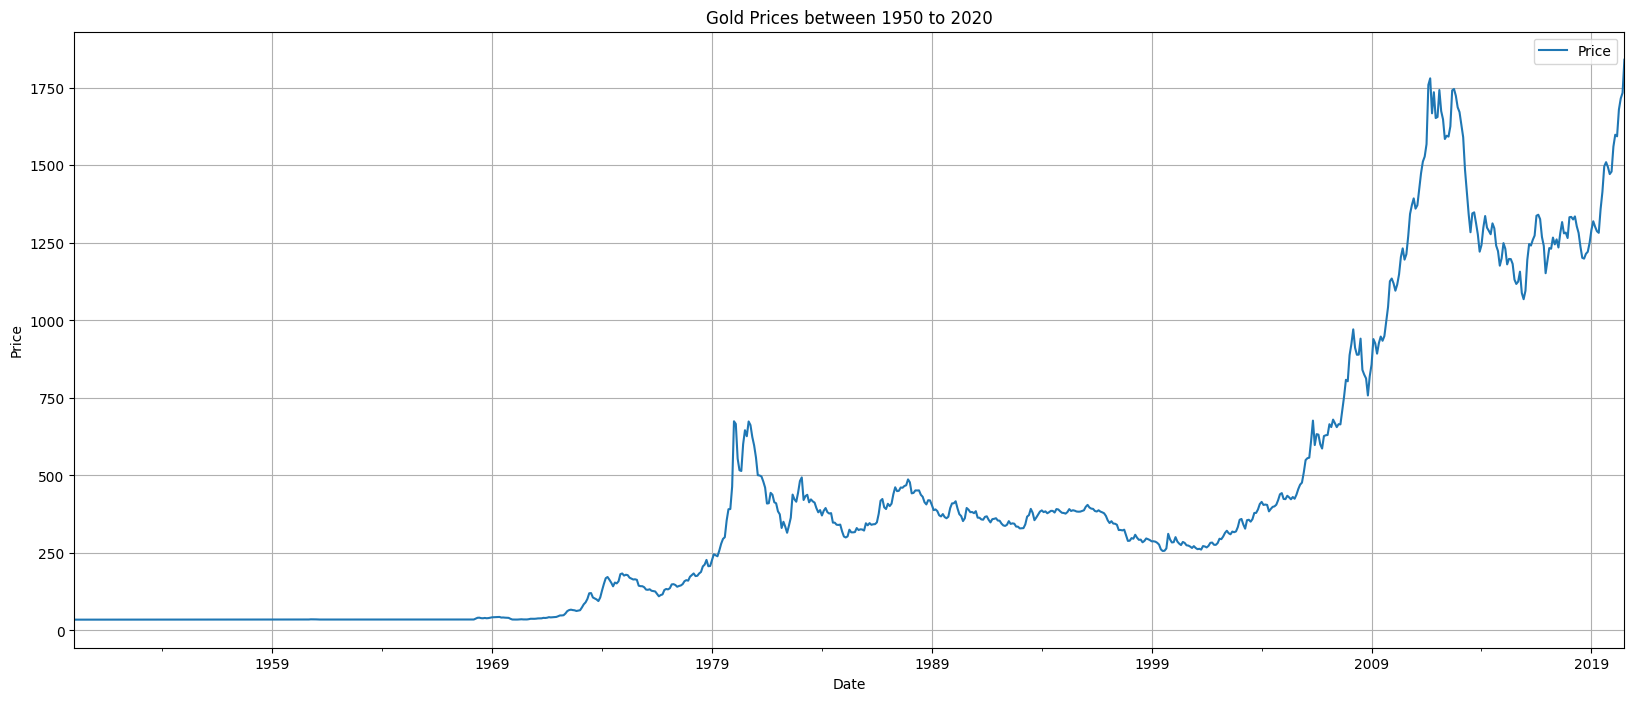

In [42]:
df.plot(figsize = (20,8))
plt.title("Gold Prices between 1950 to 2020")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [43]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


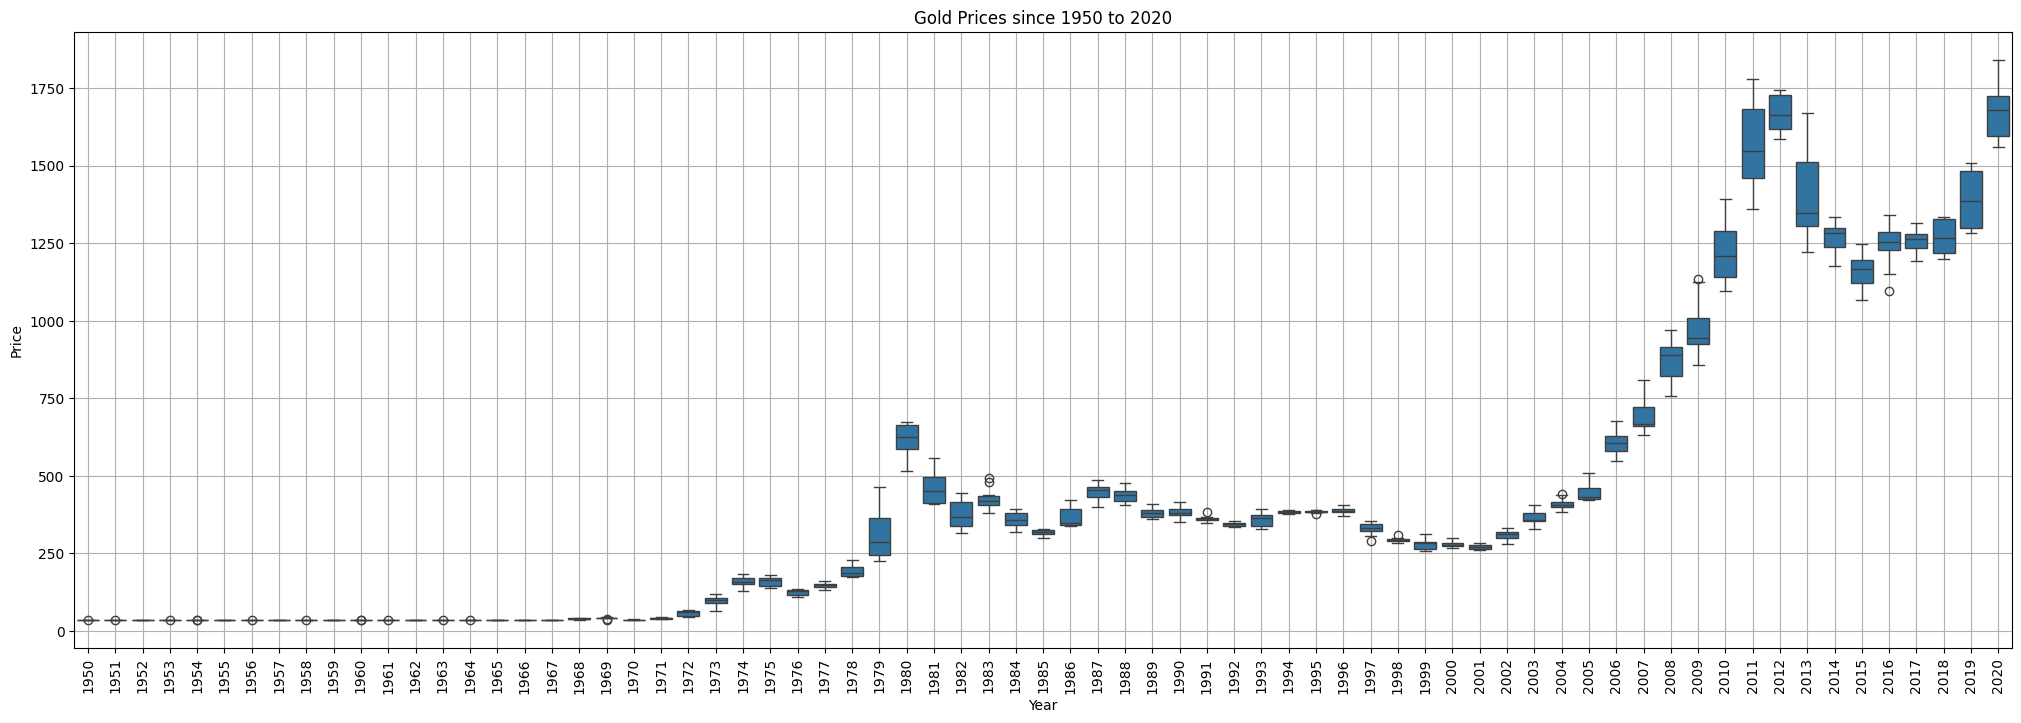

In [44]:
_, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax = ax)
plt.title("Gold Prices since 1950 to 2020")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()

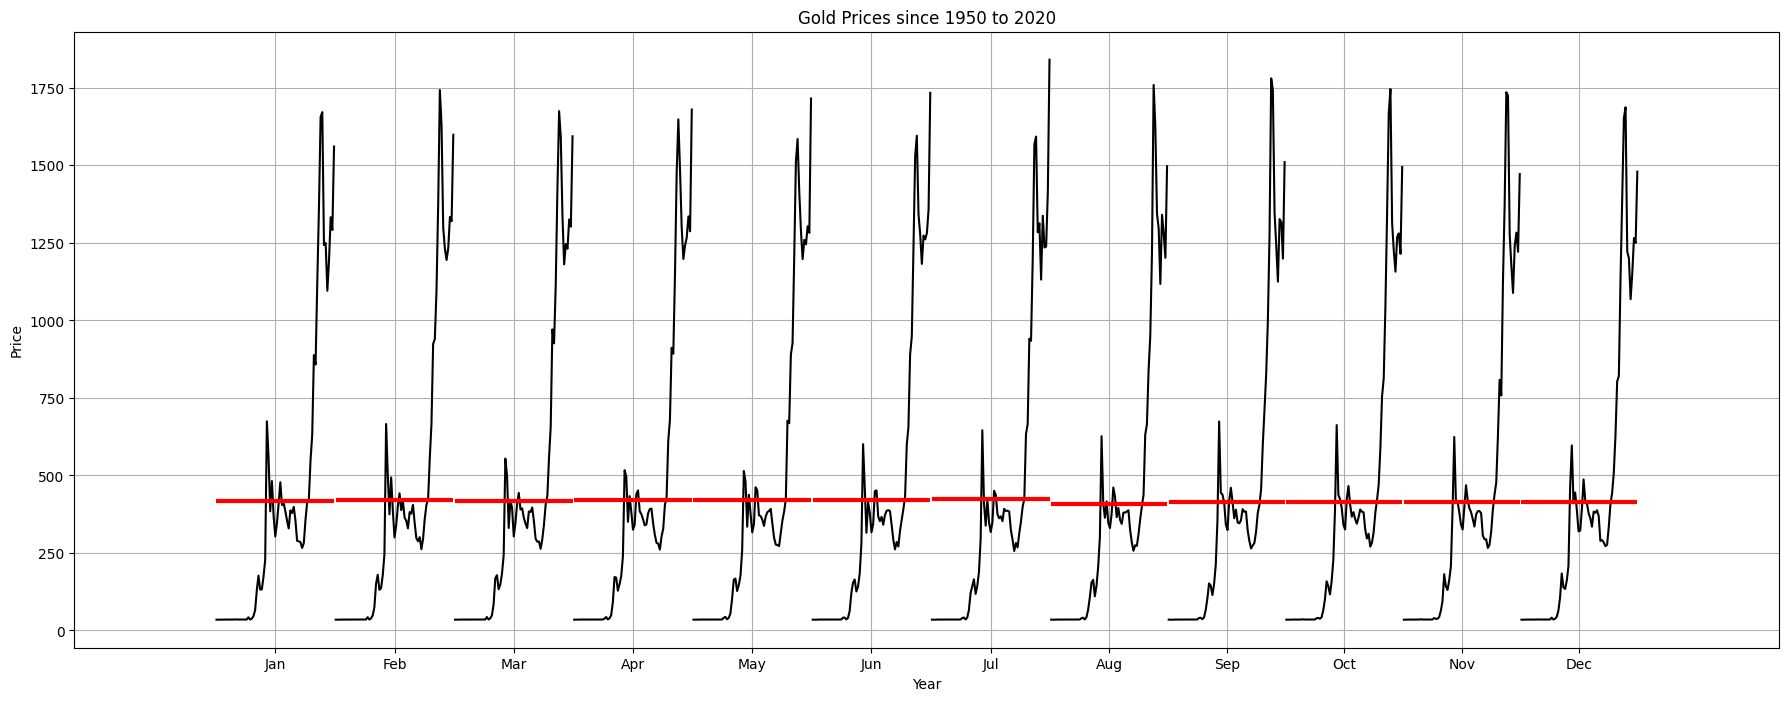

In [45]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize = (22,8))
month_plot(df, ylabel = 'Gold Price', ax=ax)
plt.title("Gold Prices since 1950 to 2020")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

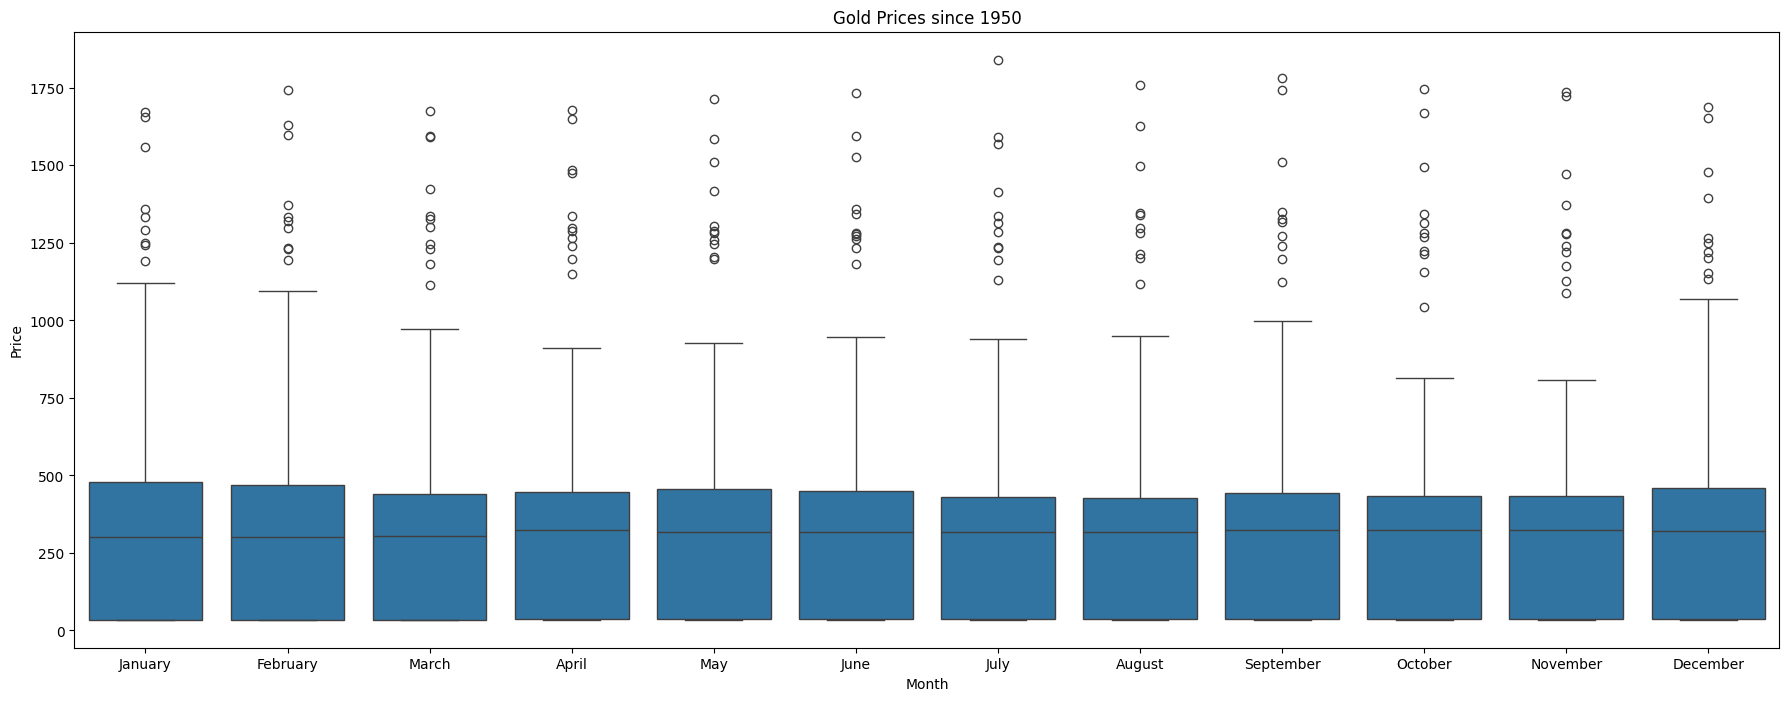

In [46]:
_,ax = plt.subplots(figsize = (22, 8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title("Gold Prices since 1950")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

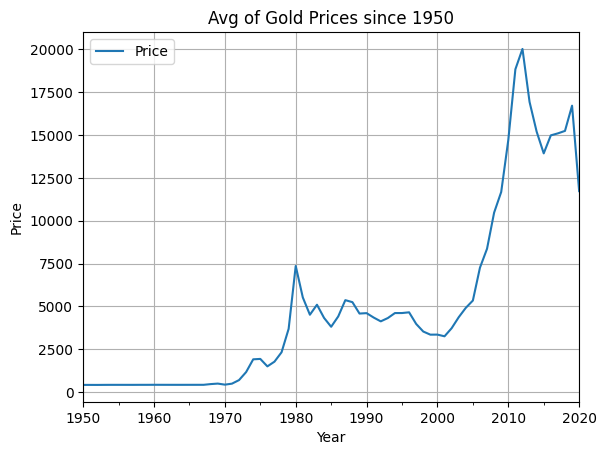

In [47]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.plot()
plt.title("Avg of Gold Prices since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

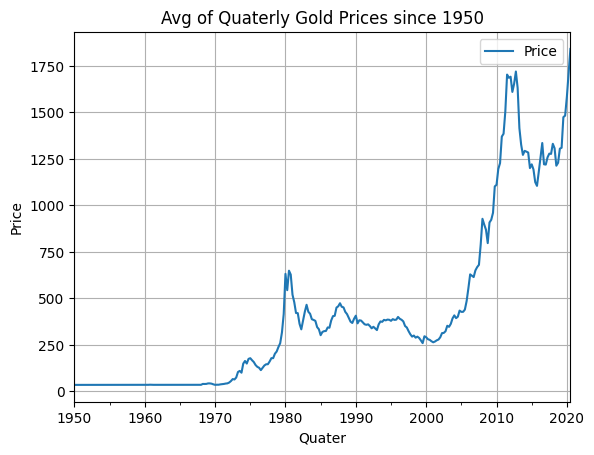

In [48]:
df.quaterly_sum = df.resample('Q').mean()
df.quaterly_sum.plot()
plt.title("Avg of Quaterly Gold Prices since 1950")
plt.xlabel("Quater")
plt.ylabel("Price")
plt.grid()

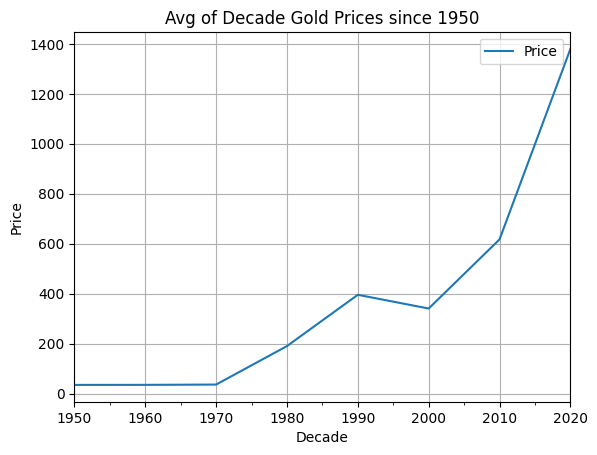

In [49]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Avg of Decade Gold Prices since 1950")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()

In [50]:
# Calculate mean and standard deviation for each year
mean_price_per_year = df.groupby(df.index.year)['Price'].mean()
std_price_per_year = df.groupby(df.index.year)['Price'].std()

# Merge mean and standard deviation into a single DataFrame
df_1 = pd.merge(mean_price_per_year, std_price_per_year, left_index=True, right_index=True, suffixes=('_mean', '_std'))

# Calculate coefficient of variation
df_1['Cov_pct'] = ((df_1['Price_std'] / df_1['Price_mean']) * 100).round(2)

# Display the DataFrame
df_1.head()



,Price_mean,Price_std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


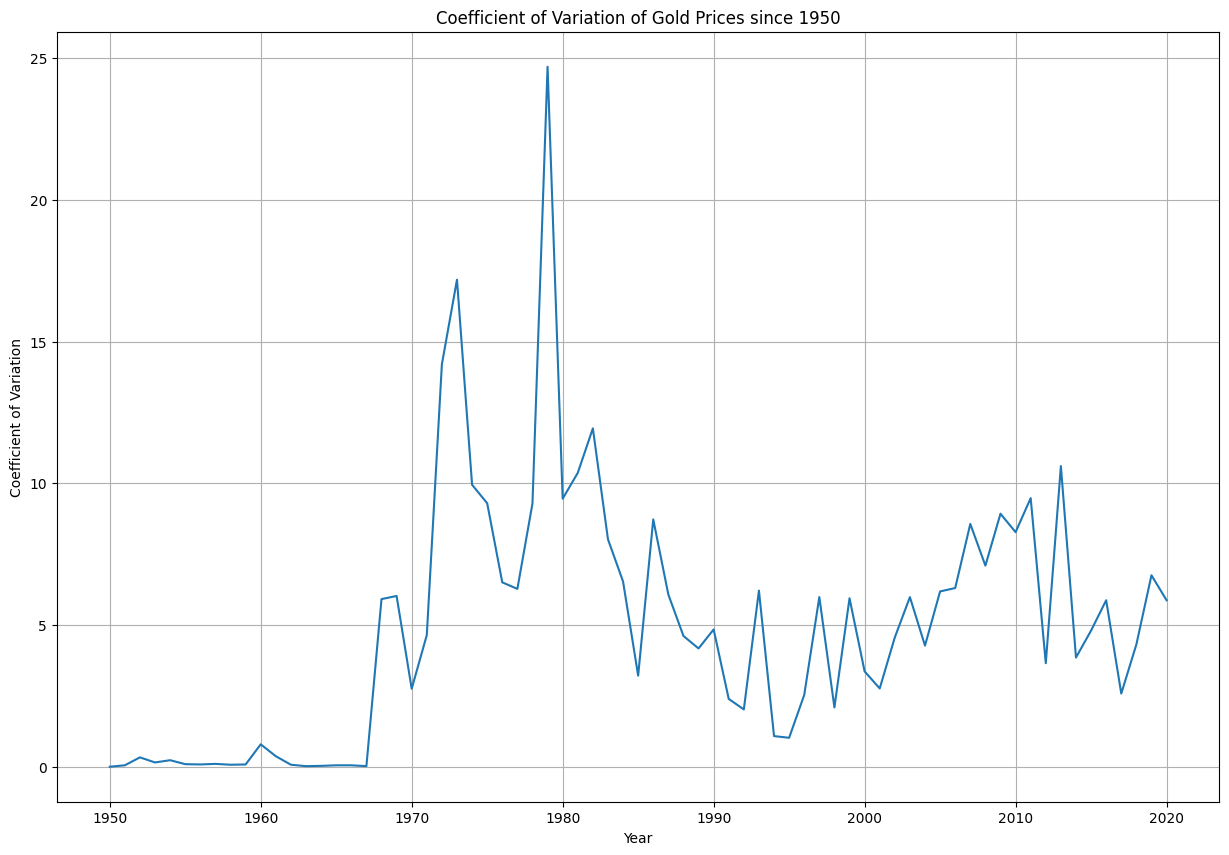

In [51]:
fig, ax = plt.subplots(figsize = (15, 10))
df_1['Cov_pct'].plot()
plt.title("Coefficient of Variation of Gold Prices since 1950")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation")
plt.grid()

In [52]:
train =df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [53]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


Text(0, 0.5, 'Price')

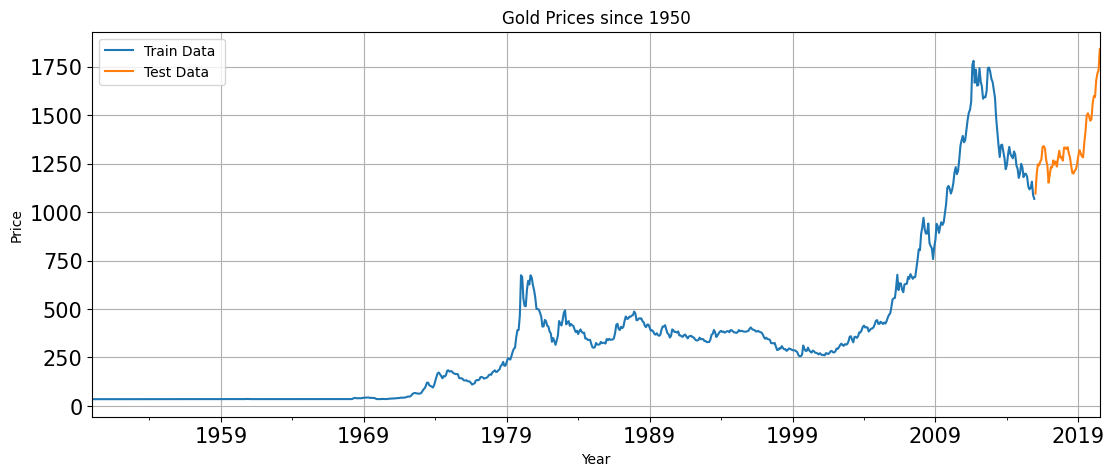

In [54]:
train["Price"].plot(figsize = (13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5), fontsize = 15)
plt.grid()
plt.legend(["Train Data ", "Test Data"])
plt.title("Gold Prices since 1950")
plt.xlabel("Year")
plt.ylabel("Price")

In [55]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) +1  for i in range(len(test))]
len(train_time), len(test_time )

(792, 55)

In [56]:
LR_train = train.copy()
LR_test = test.copy()

In [57]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [58]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

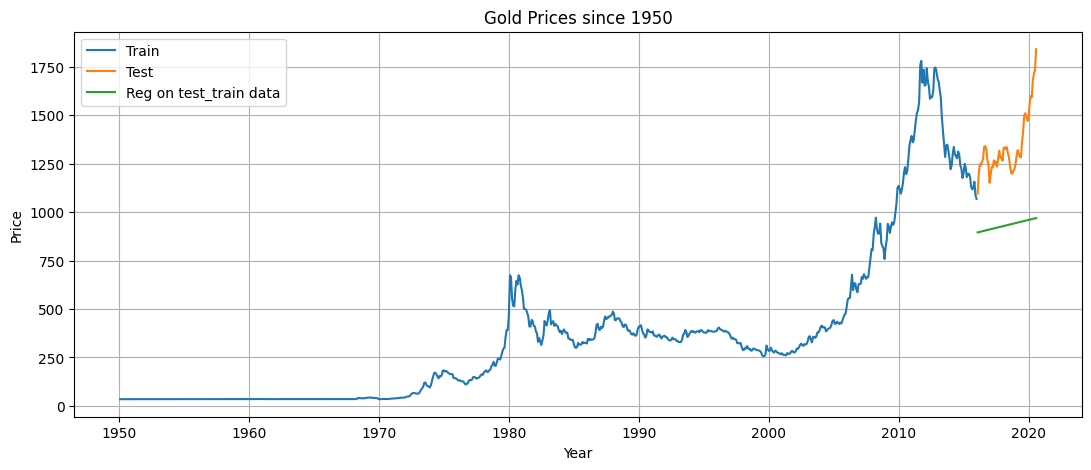

In [59]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['Forecast'] = test_prediction_model1

plt.figure(figsize = (13,5))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(LR_test['Forecast'], label = 'Reg on test_train data')
plt.title("Gold Prices since 1950")
plt.xlabel("Year")
plt.legend(loc = 'best')
plt.ylabel("Price")
plt.grid()

In [60]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Price'])

1. ADF :  0.8143240077835248
2. P-Value :  0.9918639010465631
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 835
5. Critical Values :
	 1% :  -3.4382057088878644
	 5% :  -2.865007578546518
	 10% :  -2.5686164240381513


In [61]:
# Differencing to make the series stationary
df['Price_diff'] = df['Price'].diff().dropna()

# Re-testing the transformed series
ad_test(df['Price_diff'].dropna())

1. ADF :  -6.217086926407336
2. P-Value :  5.33328251334224e-08
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 835
5. Critical Values :
	 1% :  -3.4382057088878644
	 5% :  -2.865007578546518
	 10% :  -2.5686164240381513


In [34]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Price'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8203.672, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8106.790, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=7832.826, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7786.785, Time=0.40 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=2.08 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=7793.301, Time=1.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=7796.870, Time=1.87 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=2.86 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=7788.411, Time=1.91 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 12.206 seconds


In [63]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Price'], order=(1, 0, 5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  792
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3587.418
Date:                Tue, 21 May 2024   AIC                           7190.837
Time:                        06:02:45   BIC                           7228.233
Sample:                    01-31-1950   HQIC                          7205.209
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        352.3720   1377.444      0.256      0.798   -2347.368    3052.112
ar.L1          0.9989      0.002    476.255      0.000       0.995       1.003
ma.L1          0.2296      0.019     12.250      0.0

In [64]:
def mape(actual, pred):
  return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [65]:
mape_model1_test= mape(test['Price'].values, test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [66]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index = ['Regression On Time'])
results

,Test Mape (%)
Regression On Time,29.76


In [67]:
Navie_train = train.copy()
Navie_test = test.copy()

In [68]:
Navie_test['navie'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Navie_test.head()

,Price,navie
month,,
2016-01-31,1095.655,1068.317
2016-02-29,1194.893,1068.317
2016-03-31,1246.312,1068.317
2016-04-30,1241.452,1068.317
2016-05-31,1259.755,1068.317


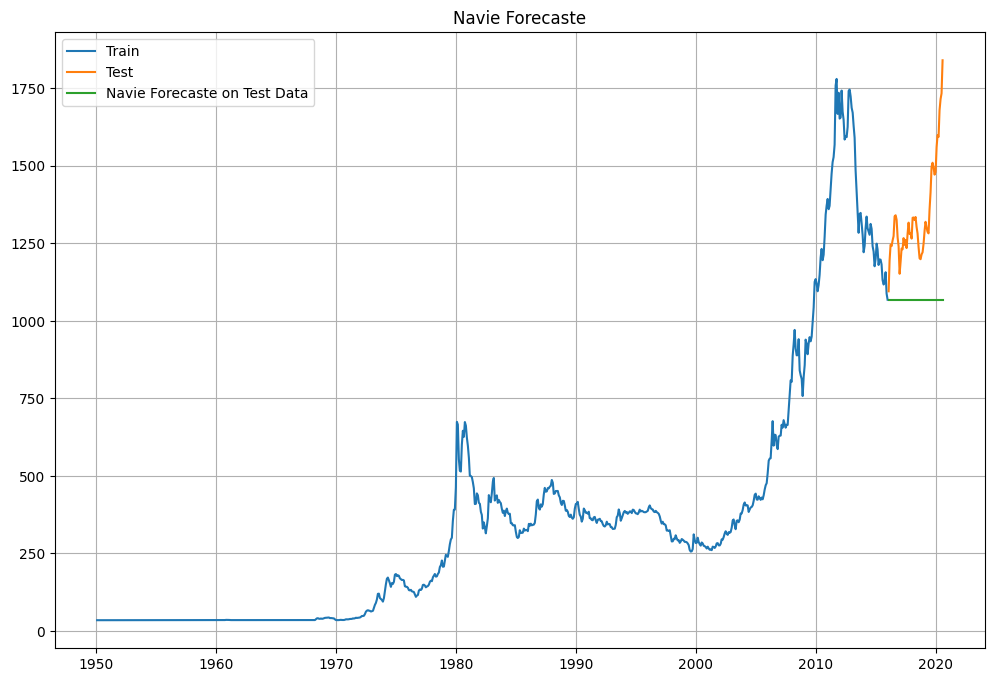

In [69]:
plt.figure(figsize = (12,8))
plt.plot(Navie_train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Navie_test['navie'], label = 'Navie Forecaste on Test Data')
plt.legend(loc = 'best')
plt.title("Navie Forecaste")
plt.grid();

In [70]:
mape_model2_test = mape(test['Price'].values, Navie_test['navie'].values)
print("For Navie Forecast on test data, MAPE is %3.3f"%(mape_model2_test),"%")

For Navie Forecast on test data, MAPE is 19.380 %


In [71]:
resultsDF_2 = pd.DataFrame({'Test Mape (%)': [mape_model2_test]}, index = ['NavieModel'])
result = pd.concat([results, resultsDF_2])
result

,Test Mape (%)
Regression On Time,29.76
NavieModel,19.38


In [72]:
final_model = ExponentialSmoothing(df['Price'], trend='additive', seasonal='additive').fit(smoothing_level=0.4,
                                                                                                             smoothing_trend=0.3,
                                                                                                             smoothing_seasonal=0.6)


In [73]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("For Final Model, MAPE is %3.3f"%(Mape_final_model),"%")

For Final Model, MAPE is 17.240 %


In [74]:
predictions = final_model.forecast(steps = len(test))

In [75]:
pred_df = pd.DataFrame({'lower_CI':predictions - 1.96 * np.std(final_model.resid, ddof = 1),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof = 1)})

pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


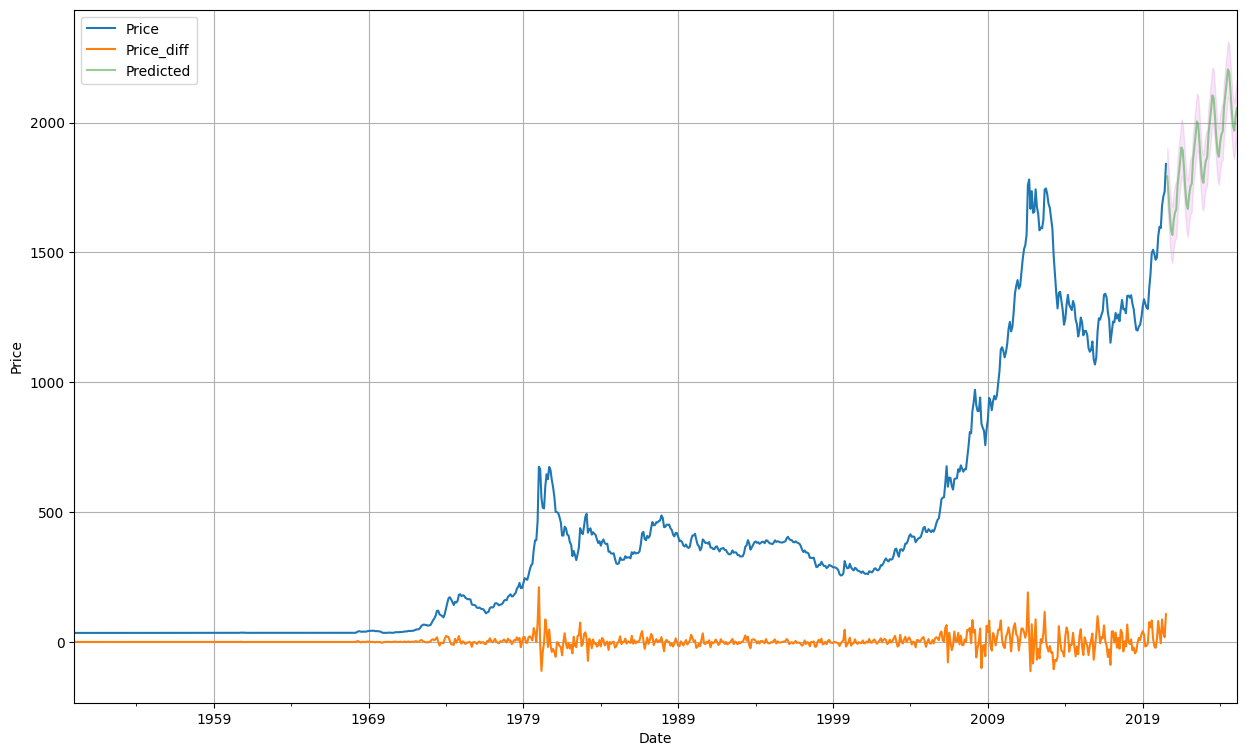

In [76]:
axis = df.plot(label = 'Actual', figsize = (15,9))
pred_df['prediction'].plot(ax = axis, label = 'Predicted', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'],color = 'm', alpha = 0.1)
axis.set_xlabel('Date')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()


In [79]:
pred_df['prediction'].head()

2020-08-31    1792.871037
2020-09-30    1723.457050
2020-10-31    1646.718895
2020-11-30    1584.909572
2020-12-31    1567.478262
Freq: M, Name: prediction, dtype: float64